In [1]:
import pandas as pd

df=pd.read_csv('datasets/Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [2]:
df.drop('Id', axis=1, inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df.shape

(252000, 12)

In [4]:
sp=pd.read_csv('datasets/Sample Prediction Dataset.csv')
sp.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [5]:
sp.shape

(28000, 2)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

In [7]:
df['Income_in_thousand']=df['Income']/1000
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_in_thousand
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1303.834
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,7574.516
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,3991.815
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,6256.451
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,5768.871


In [8]:
# Group by risk_flag and calculate the mean income
summary_stats=df.groupby('Risk_Flag')['Income_in_thousand'].describe()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Risk_Flag,,,,,,,,
0,221004.0,5000.448721,2872.254895,10.310,2520.63275,5002.134,7470.480,9999.938
1,30996.0,4973.358838,2921.064502,10.675,2421.02900,4977.653,7556.052,9994.501


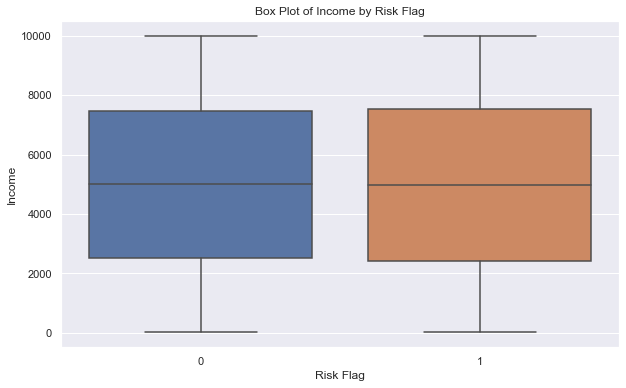

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk_Flag', y='Income_in_thousand', data=df)
plt.title('Box Plot of Income by Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Income')
plt.show()

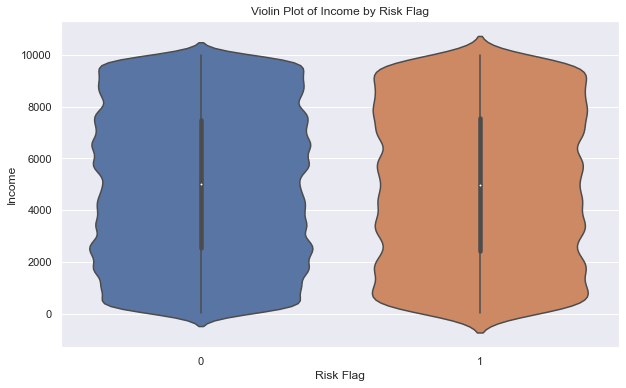

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Risk_Flag', y='Income_in_thousand', data=df)
plt.title('Violin Plot of Income by Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Income')
plt.show()

In [11]:
from scipy.stats import ttest_ind

income_non_defaulter=df[df['Risk_Flag'] == 0]['Income_in_thousand']
income_defaulter=df[df['Risk_Flag'] == 1]['Income_in_thousand']

# Perform t-test
t_stat, p_val=ttest_ind(income_non_defaulter, income_defaulter)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 1.5517553379318287, P-value: 0.12072203194511714


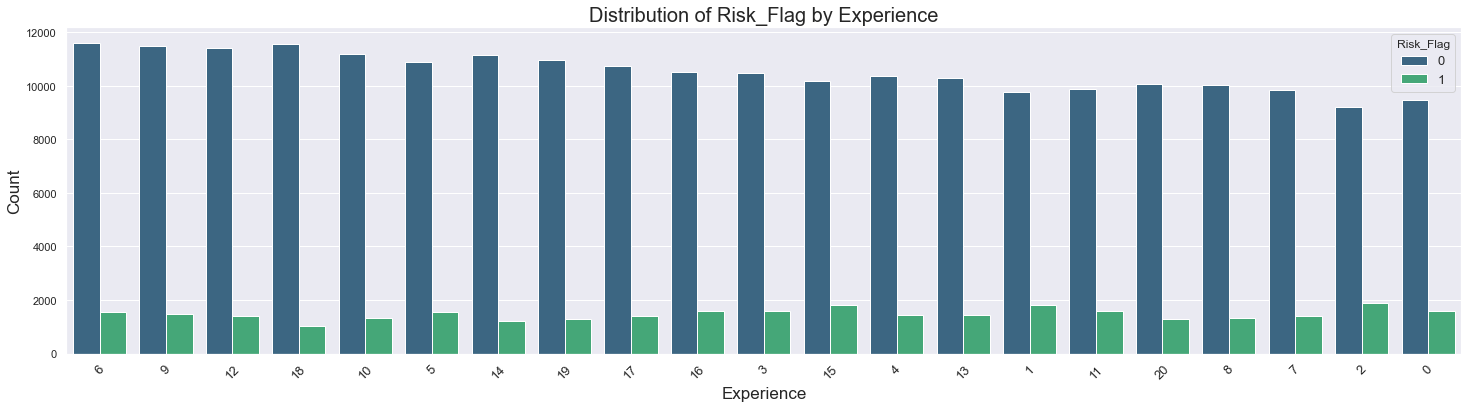

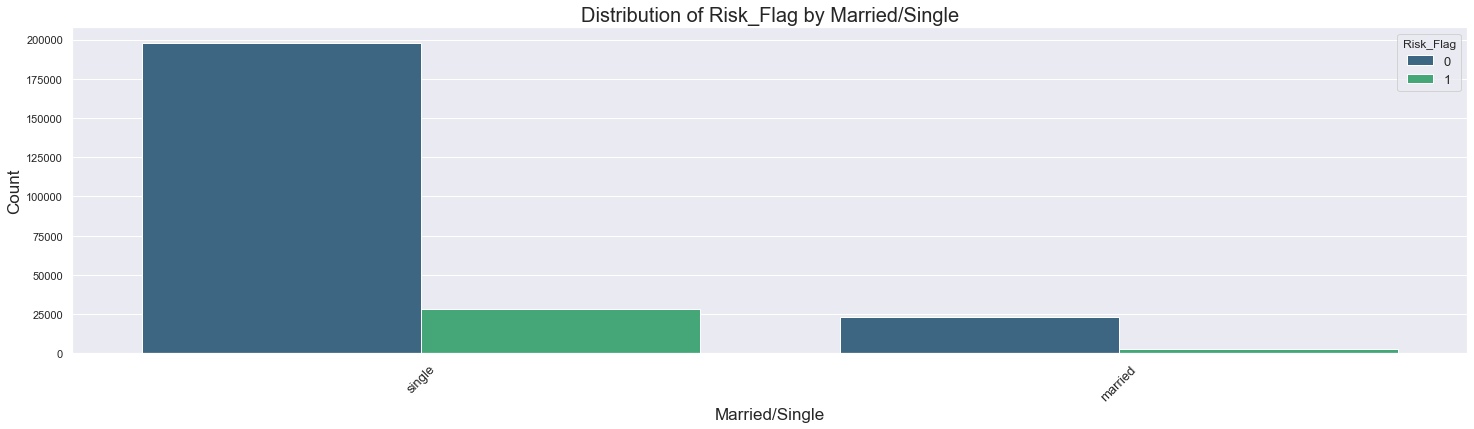

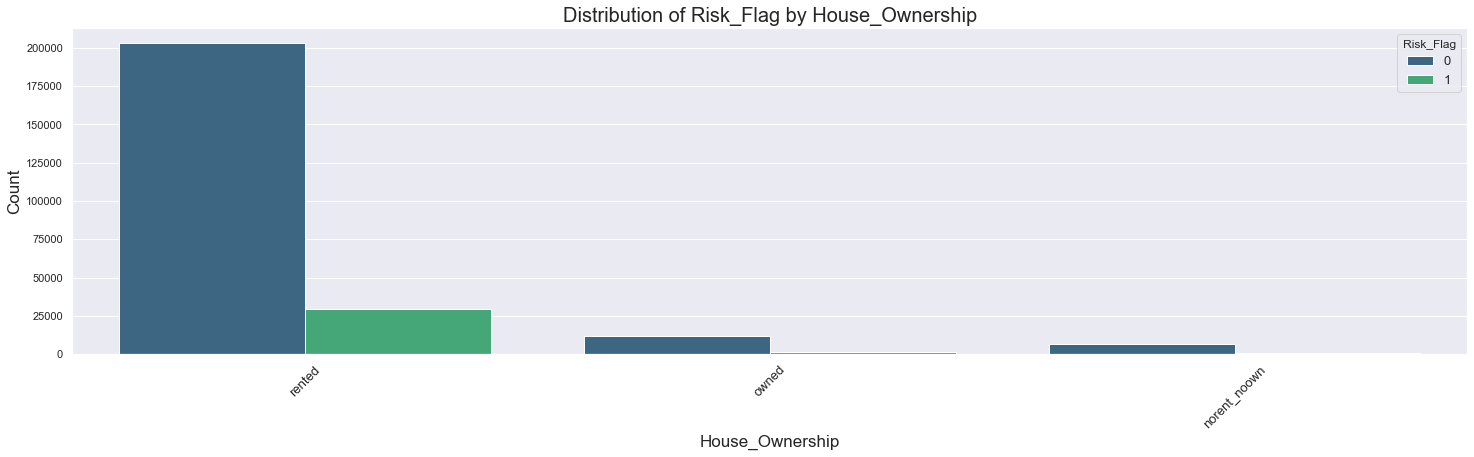

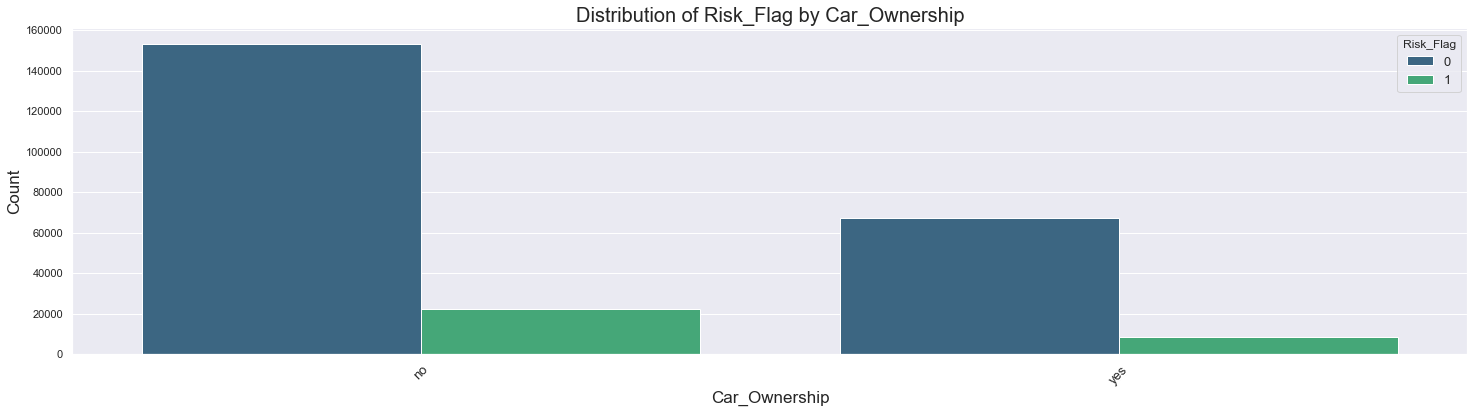

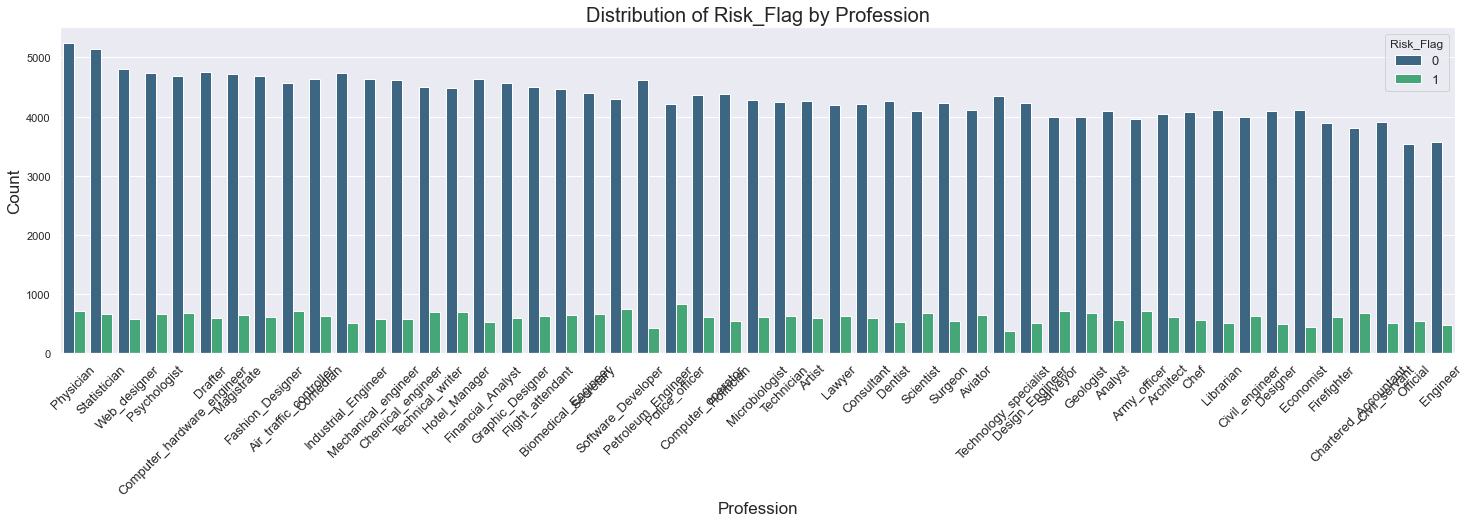

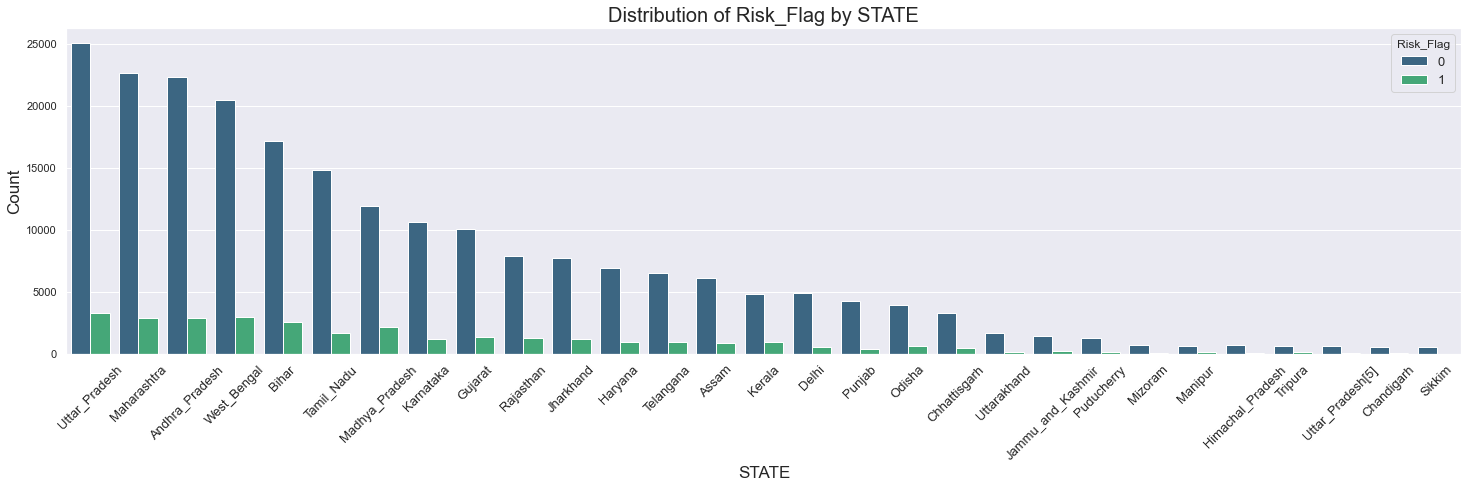

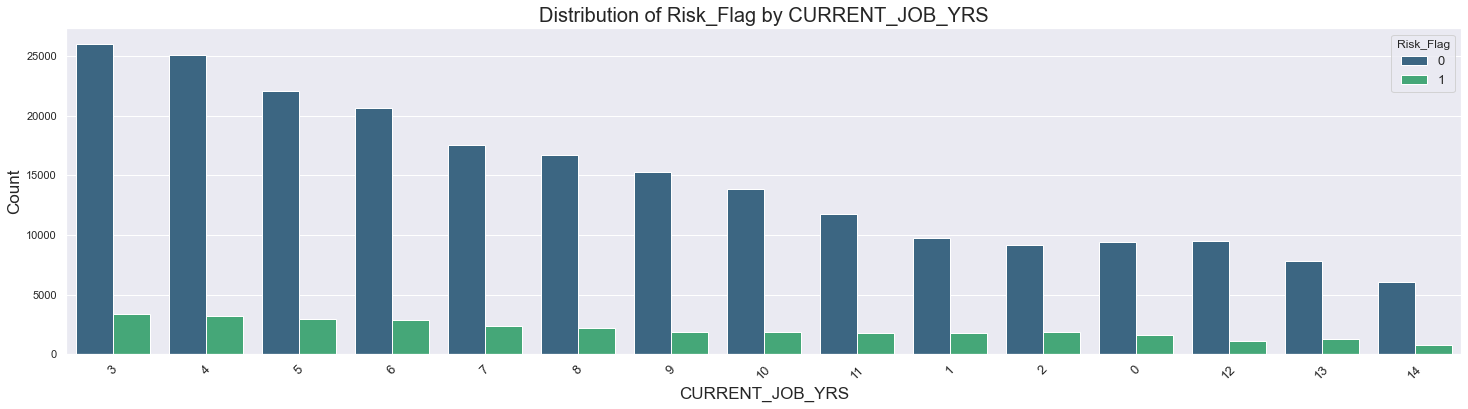

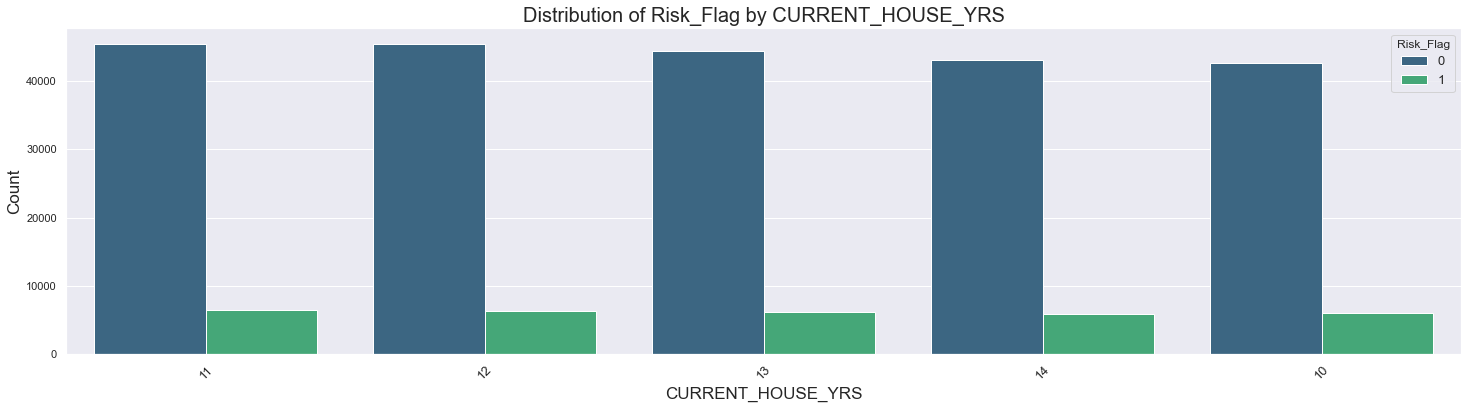

In [12]:
def plot_categorical_vs_risk(data, categorical_columns, target_column='Risk_Flag'):
    """
    Function to create count plots for categorical variables against the target variable.

    Parameters:
    data (pd.DataFrame): The dataset containing the categorical variables and the target variable.
    categorical_columns (list): List of categorical columns to plot.
    target_column (str): The target column name (default is 'Risk_Flag').
    """
    for column in categorical_columns:
        plt.figure(figsize=(25, 6))
        sns.countplot(x=column, hue=target_column, data=data, order=data[column].value_counts().index ,palette='viridis')
        plt.title(f'Distribution of {target_column} by {column}', fontsize=20)
        plt.xlabel(column, fontsize=17)
        plt.ylabel('Count', fontsize=17)
        plt.legend(title=target_column, fontsize=13)
        plt.xticks(rotation=45, fontsize=13)
        plt.show()

categorical_columns=['Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
                    'Profession', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

plot_categorical_vs_risk(df, categorical_columns)

In [13]:
def groupby_categorical(data, categorical_columns, target_column='Risk_Flag', descending=True):
    """
    Function to group by categorical variables and calculate summary statistics for the target variable.

    Parameters:
    data (pd.DataFrame): The dataset containing the categorical variables and the target variable.
    categorical_columns (list): List of categorical columns to group by.
    target_column (str): The target column name (default is 'Risk_Flag').
    descending (bool): Whether to sort the results in descending order (default is True).

    Returns:
    list of pd.DataFrame: A list of DataFrames, each corresponding to groupby results for a categorical column.
    """
    groupby_results=[]

    for column in categorical_columns:
        groupby_df=data.groupby(column)[target_column].mean().reset_index()
        groupby_df.rename(columns={target_column: f'{target_column}_mean'}, inplace=True)
        groupby_df=groupby_df.sort_values(by=f'{target_column}_mean', ascending=not descending)
        groupby_results.append(groupby_df)

    return groupby_results

# Function to print DataFrames with colored headers
def print_colored_dfs(categorical_columns, groupby_results):
    HEADER_COLOR='\033[95m'  # Magenta
    COLUMN_COLOR='\033[94m'  # Blue
    END_COLOR='\033[0m'      # Reset color

    for column, result in zip(categorical_columns, groupby_results):
        # Print the header in magenta
        print(f'{HEADER_COLOR}Groupby result for {column}:{END_COLOR}')
        # Print the column names in blue
        column_names = '  '.join(result.columns)
        print(f'{COLUMN_COLOR}{column_names}{END_COLOR}')
        # Print the DataFrame
        print(result.to_string(index=False), '\n')

# Example usage
categorical_columns=['Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
                      'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']



# Get the groupby results
groupby_results=groupby_categorical(df, categorical_columns)

# Print the results for each categorical variable separately with colors
print_colored_dfs(categorical_columns, groupby_results)

Groupby result for Experience:
Experience  Risk_Flag_mean
 Experience  Risk_Flag_mean
          2        0.170470
          1        0.155680
         15        0.150755
          0        0.143258
         11        0.138353
         16        0.132166
          3        0.131411
          5        0.125794
          7        0.124911
          4        0.122724
         13        0.122172
          6        0.118331
          8        0.117533
         17        0.115819
         20        0.113128
          9        0.112786
         12        0.109063
         19        0.106210
         10        0.105175
         14        0.097987
         18        0.081660 

Groupby result for Married/Single:
Married/Single  Risk_Flag_mean
Married/Single  Risk_Flag_mean
        single        0.125336
       married        0.102456 

Groupby result for House_Ownership:
House_Ownership  Risk_Flag_mean
House_Ownership  Risk_Flag_mean
         rented        0.125577
   norent_noown        0.099527

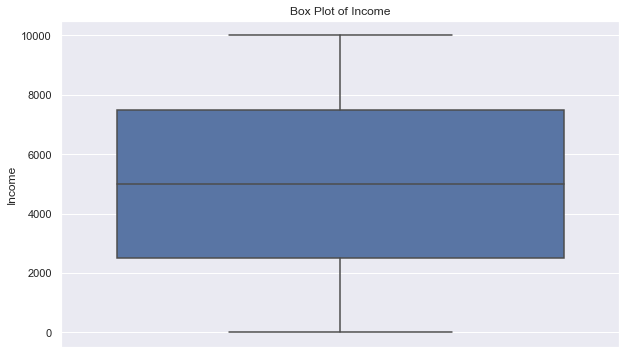

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Income_in_thousand', data=df)
plt.title('Box Plot of Income')
plt.ylabel('Income')
plt.show()

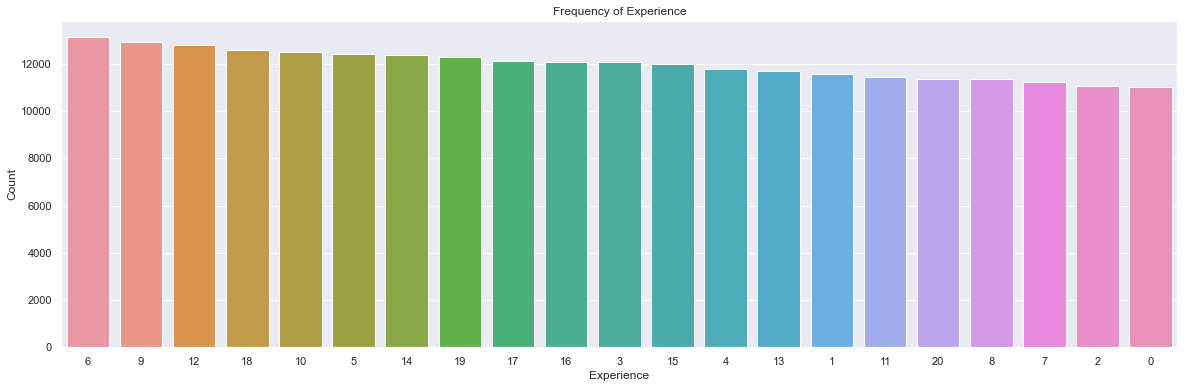

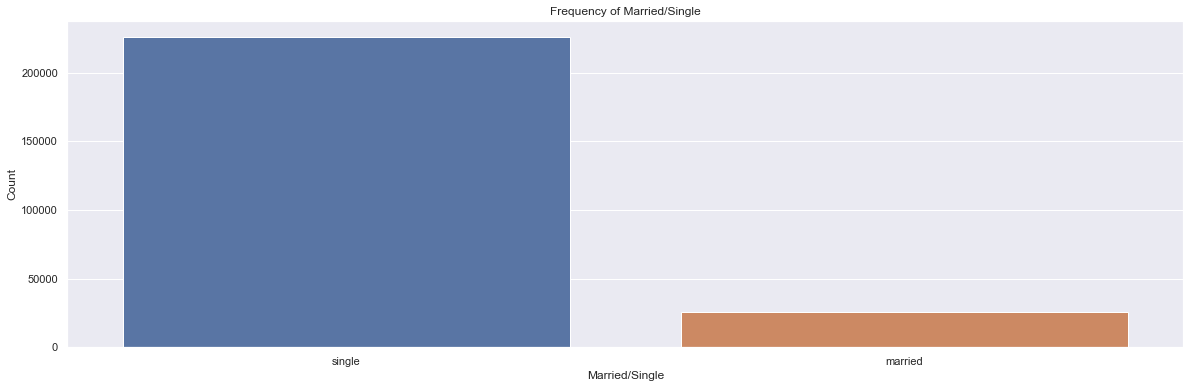

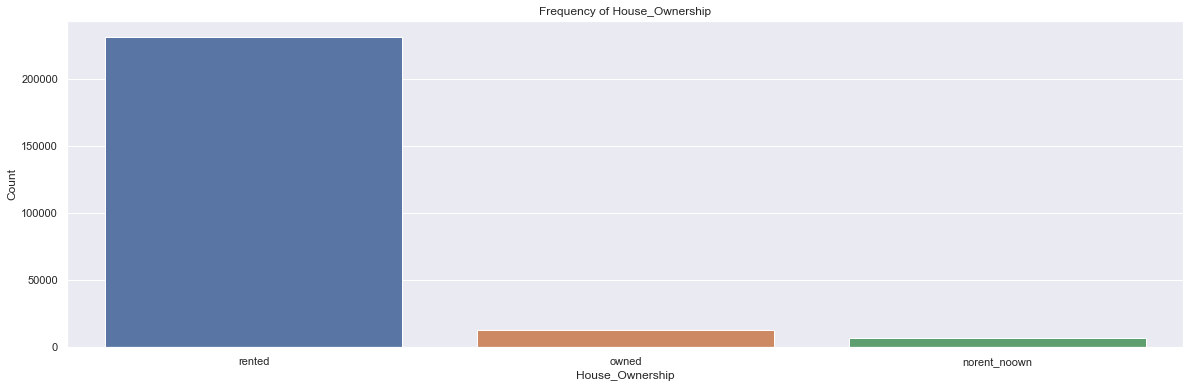

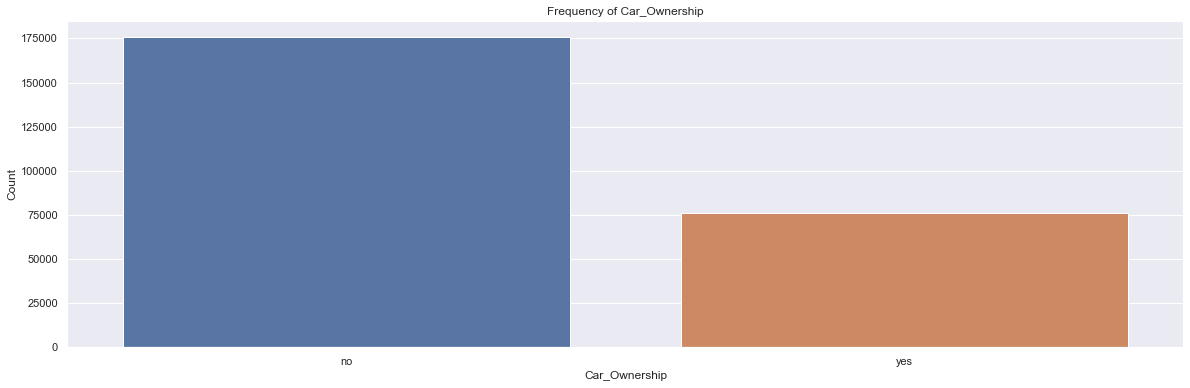

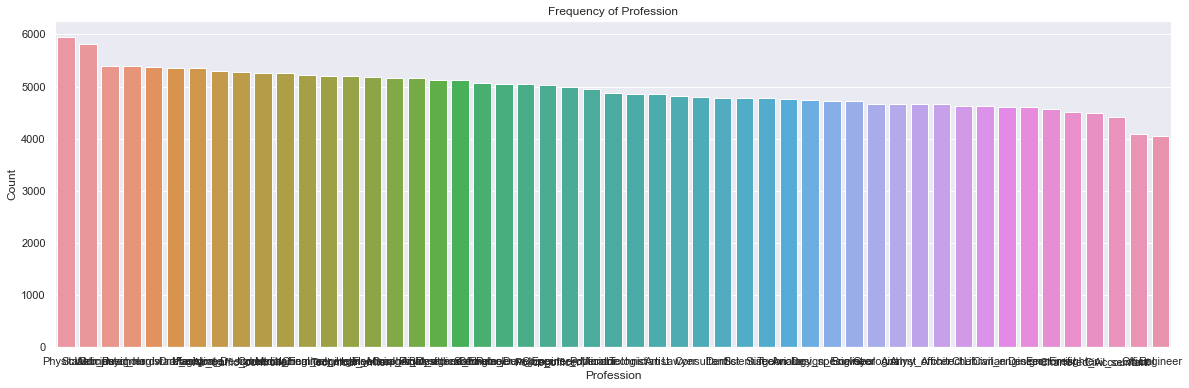

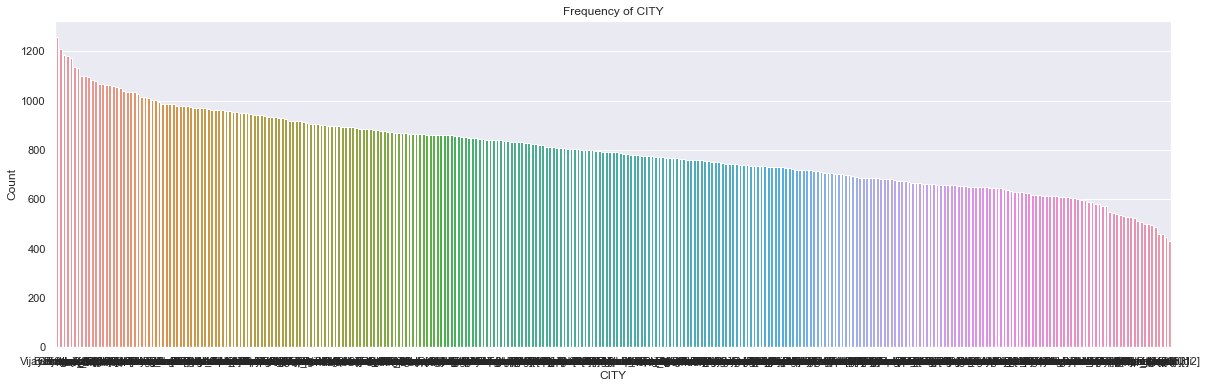

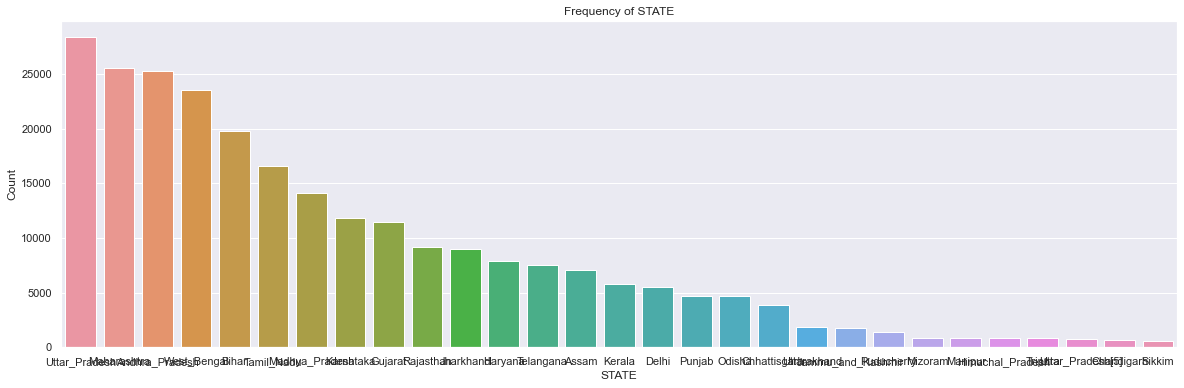

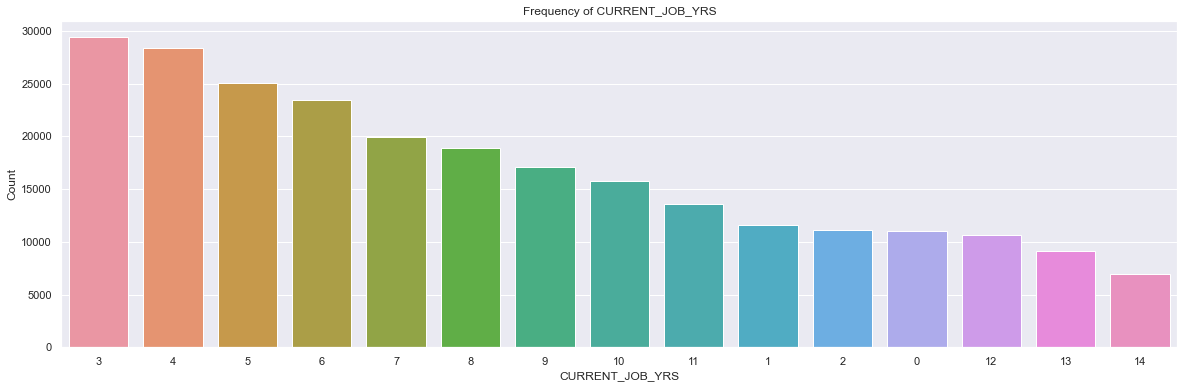

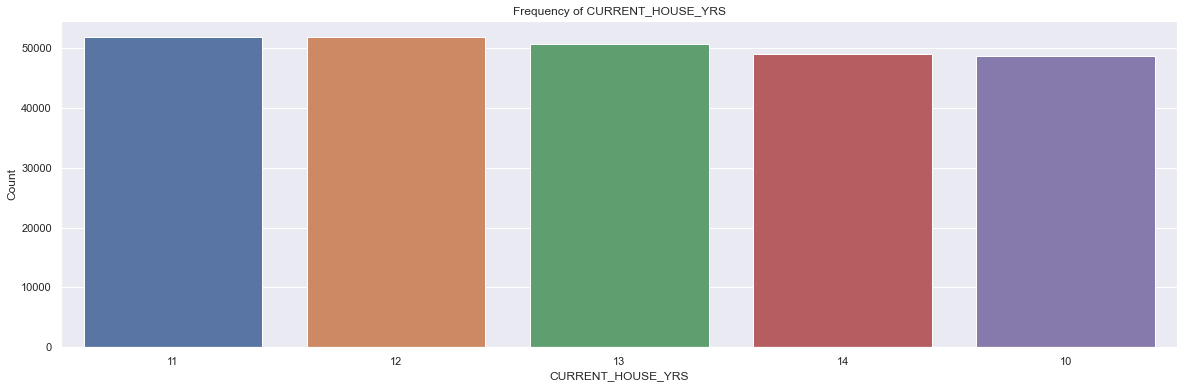

In [15]:
for i in categorical_columns:
  plt.figure(figsize=(20, 6))
  sns.countplot(x=i,
                data=df,
                order=df[i].value_counts().index)
  plt.title(f'Frequency of {i}')
  plt.ylabel('Count')
  plt.show()

In [16]:
for i in categorical_columns:
  print(f'Unique values in {i} is: {df[i].nunique()}\n')

Unique values in Experience is: 21

Unique values in Married/Single is: 2

Unique values in House_Ownership is: 3

Unique values in Car_Ownership is: 2

Unique values in Profession is: 51

Unique values in CITY is: 317

Unique values in STATE is: 29

Unique values in CURRENT_JOB_YRS is: 15

Unique values in CURRENT_HOUSE_YRS is: 5



In [17]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix=pd.crosstab(x, y)
    chi2=chi2_contingency(confusion_matrix)[0]
    n=confusion_matrix.sum().sum()
    phi2=chi2 / n
    r, k=confusion_matrix.shape
    phi2corr=max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr=r - ((r - 1) ** 2) / (n - 1)
    kcorr=k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


target_column='Risk_Flag'

for column in categorical_columns:
    cramers_v_value=cramers_v(df[column], df[target_column])
    print(f'Cramér\'s V between {column} and {target_column}: {cramers_v_value}\n')

Cramér's V between Experience and Risk_Flag: 0.05960593305920416

Cramér's V between Married/Single and Risk_Flag: 0.020977357668165247

Cramér's V between House_Ownership and Risk_Flag: 0.02679951667334829

Cramér's V between Car_Ownership and Risk_Flag: 0.02393976513093639

Cramér's V between Profession and Risk_Flag: 0.047287043386878704

Cramér's V between CITY and Risk_Flag: 0.13954477449706917

Cramér's V between STATE and Risk_Flag: 0.05290750721343328

Cramér's V between CURRENT_JOB_YRS and Risk_Flag: 0.04625364147587129

Cramér's V between CURRENT_HOUSE_YRS and Risk_Flag: 0.002897040371112285



In [18]:
from scipy.stats import pointbiserialr

def point_biserial_corr(data, target_column, categorical_columns):
    corr_results={}
    for column in categorical_columns:
        encoded_column=pd.get_dummies(data[column], drop_first=True)
        corr, p_value=pointbiserialr(data[target_column], encoded_column.iloc[:, 0])
        corr_results[column]=(corr, p_value)
    return corr_results

# Calculate Point Biserial Correlation
corr_results=point_biserial_corr(df, target_column, categorical_columns)
for column, result in corr_results.items():
    print(f'Point Biserial Correlation for {column}: Correlation={result[0]}, p-value={result[1]}\n')

Point Biserial Correlation for Experience: Correlation=0.021832575733935298, p-value=5.876879405700814e-28

Point Biserial Correlation for Married/Single: Correlation=0.02109164113472449, p-value=3.34991567012006e-26

Point Biserial Correlation for House_Ownership: Correlation=-0.023498859763601335, p-value=4.0015254254094077e-32

Point Biserial Correlation for Car_Ownership: Correlation=-0.024035618108733687, p-value=1.568877480770094e-33

Point Biserial Correlation for Profession: Correlation=-0.0006419447425901957, p-value=0.7472616887807919

Point Biserial Correlation for CITY: Correlation=0.007794368178285898, p-value=9.12389732462671e-05

Point Biserial Correlation for STATE: Correlation=0.004493038461699444, p-value=0.02410273958657451

Point Biserial Correlation for CURRENT_JOB_YRS: Correlation=0.021832575733935298, p-value=5.876879405700814e-28

Point Biserial Correlation for CURRENT_HOUSE_YRS: Correlation=0.0030666228307347928, p-value=0.12369973864547833



Profession, City, State to be dopped

In [19]:
df=df.drop(['Profession', 'CITY', 'STATE'], axis=1)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_in_thousand
0,1303834,23,3,single,rented,no,3,13,0,1303.834
1,7574516,40,10,single,rented,no,9,13,0,7574.516
2,3991815,66,4,married,rented,no,4,10,0,3991.815
3,6256451,41,2,single,rented,yes,2,12,1,6256.451
4,5768871,47,11,single,rented,no,3,14,1,5768.871


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Income              252000 non-null  int64  
 1   Age                 252000 non-null  int64  
 2   Experience          252000 non-null  int64  
 3   Married/Single      252000 non-null  object 
 4   House_Ownership     252000 non-null  object 
 5   Car_Ownership       252000 non-null  object 
 6   CURRENT_JOB_YRS     252000 non-null  int64  
 7   CURRENT_HOUSE_YRS   252000 non-null  int64  
 8   Risk_Flag           252000 non-null  int64  
 9   Income_in_thousand  252000 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 19.2+ MB


In [21]:
df['CURRENT_HOUSE_YRS'].value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64

In [22]:
df['Experience'].value_counts()

6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: Experience, dtype: int64

In [23]:
final_cat_cols=['Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

for i in final_cat_cols:
  print(f'Frequency Distribution for {i}: {df[i].value_counts(normalize=True)}\n')

Frequency Distribution for Experience: 6     0.052214
9     0.051333
12    0.050794
18    0.050004
10    0.049615
5     0.049369
14    0.049083
19    0.048758
17    0.048139
16    0.048040
3     0.047893
15    0.047591
4     0.046853
13    0.046480
1     0.045933
11    0.045433
20    0.045040
8     0.045040
7     0.044571
2     0.043996
0     0.043821
Name: Experience, dtype: float64

Frequency Distribution for Married/Single: single     0.897905
married    0.102095
Name: Married/Single, dtype: float64

Frequency Distribution for House_Ownership: rented          0.920230
owned           0.051262
norent_noown    0.028508
Name: House_Ownership, dtype: float64

Frequency Distribution for Car_Ownership: no     0.698413
yes    0.301587
Name: Car_Ownership, dtype: float64

Frequency Distribution for CURRENT_JOB_YRS: 3     0.116905
4     0.112456
5     0.099567
6     0.093218
7     0.079067
8     0.074897
9     0.067984
10    0.062571
11    0.053948
1     0.045933
2     0.043996
0     0.04382

In [24]:
mapping_ms={'single': 0, 'married': 1}
mapping_ho={'rented': 0, 'owned': 1, 'norent_noown': 2}
mapping_co={'no':0, 'yes': 1}

df['Married/Single']=df['Married/Single'].map(lambda x: mapping_ms[x])
df['House_Ownership']=df['House_Ownership'].map(lambda x: mapping_ho[x])
df['Car_Ownership'] = df['Car_Ownership'].map(lambda x: mapping_co[x])

for i in final_cat_cols:
  print(f'Frequency Distribution for {i}: {df[i].value_counts(normalize=True)}\n')

Frequency Distribution for Experience: 6     0.052214
9     0.051333
12    0.050794
18    0.050004
10    0.049615
5     0.049369
14    0.049083
19    0.048758
17    0.048139
16    0.048040
3     0.047893
15    0.047591
4     0.046853
13    0.046480
1     0.045933
11    0.045433
20    0.045040
8     0.045040
7     0.044571
2     0.043996
0     0.043821
Name: Experience, dtype: float64

Frequency Distribution for Married/Single: 0    0.897905
1    0.102095
Name: Married/Single, dtype: float64

Frequency Distribution for House_Ownership: 0    0.920230
1    0.051262
2    0.028508
Name: House_Ownership, dtype: float64

Frequency Distribution for Car_Ownership: 0    0.698413
1    0.301587
Name: Car_Ownership, dtype: float64

Frequency Distribution for CURRENT_JOB_YRS: 3     0.116905
4     0.112456
5     0.099567
6     0.093218
7     0.079067
8     0.074897
9     0.067984
10    0.062571
11    0.053948
1     0.045933
2     0.043996
0     0.043821
12    0.042083
13    0.036107
14    0.027444
Na

In [25]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_in_thousand
0,1303834,23,3,0,0,0,3,13,0,1303.834
1,7574516,40,10,0,0,0,9,13,0,7574.516
2,3991815,66,4,1,0,0,4,10,0,3991.815
3,6256451,41,2,0,0,1,2,12,1,6256.451
4,5768871,47,11,0,0,0,3,14,1,5768.871


In [26]:
t=pd.read_csv('datasets/Test Data.csv')
sp.shape, t.shape

((28000, 2), (28000, 12))

In [27]:
sp.head(3)

,id,risk_flag
0,1,0
1,2,0
2,3,1


In [28]:
t.head(3)

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14


In [29]:
X=df.drop(['Risk_Flag', 'Income_in_thousand'], axis=1)
y=df['Risk_Flag']

In [30]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,0,0,0,3,13
1,7574516,40,10,0,0,0,9,13
2,3991815,66,4,1,0,0,4,10
3,6256451,41,2,0,0,1,2,12
4,5768871,47,11,0,0,0,3,14


In [31]:
X=X/X.max()
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.130384,0.291139,0.15,0.0,0.0,0.0,0.214286,0.928571
1,0.757456,0.506329,0.50,0.0,0.0,0.0,0.642857,0.928571
2,0.399184,0.835443,0.20,1.0,0.0,0.0,0.285714,0.714286
3,0.625649,0.518987,0.10,0.0,0.0,1.0,0.142857,0.857143
4,0.576891,0.594937,0.55,0.0,0.0,0.0,0.214286,1.000000


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((201600, 8), (50400, 8), (201600,), (50400,))

In [38]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

In [39]:
# Define classifiers and their hyperparameter grids
classifiers = {
    "RandomForestClassifier": (RandomForestClassifier(random_state=100), {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None]
    }),
    "ExtraTreesClassifier": (ExtraTreesClassifier(random_state=100), {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None]
    }),
    "GradientBoostingClassifier": (GradientBoostingClassifier(random_state=100), {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }),
    "DecisionTreeClassifier": (DecisionTreeClassifier(random_state=100), {
        'classifier__max_depth': [10, 20, None]
    }),
    "AdaBoostClassifier": (AdaBoostClassifier(random_state=100), {
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.01, 0.1, 1.0]
    }),
    "BaggingClassifier": (BaggingClassifier(random_state=100), {
        'classifier__n_estimators': [10, 50, 100]
    }),
    "XGBClassifier": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=100), {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }),
    "LGBMClassifier": (LGBMClassifier(random_state=100), {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }),
    "LogisticRegression": (LogisticRegression(max_iter=1000, random_state=100), {
        'classifier__C': [0.01, 0.1, 1.0, 10.0]
    })
}

In [40]:
from sklearn.model_selection import StratifiedKFold

def evaluate_classifiers_with_cv(X_train, y_train, X_test, y_test):
    smote_sampler = SMOTE(random_state=9)
    results = {}
    best_f1_score = 0
    best_model = None
    best_model_name = ""

    for name, (clf, params) in classifiers.items():
        pipeline = Pipeline(steps=[('smote', smote_sampler), ('classifier', clf)])
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid=params, cv=cv, scoring='f1', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_clf = grid_search.best_estimator_
        y_pred = best_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']

        results[name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Classification Report": report,
            "Best Params": grid_search.best_params_
        }

        # Check if the current model has the best F1 score for class 1
        if f1 > best_f1_score:
            best_f1_score = f1
            best_model = best_clf
            best_model_name = name

        print(f"Results for {name}:\n")
        print(f"Accuracy: {accuracy:.4f}\n")
        print(f"Precision (Class 1): {precision:.4f}\n")
        print(f"Recall (Class 1): {recall:.4f}\n")
        print(f"F1 Score (Class 1): {f1:.4f}\n")
        print(f"Best Parameters: {grid_search.best_params_}\n")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

    # Save the best model to Google Drive
    if best_model:
        joblib_file = f"model/best_model_bank_load_defaulter_{best_model_name}.joblib"
        joblib.dump(best_model, joblib_file)
        print(f"Best model saved as {joblib_file} with F1 Score: {best_f1_score:.4f}")

    return results

# Evaluate the classifiers with cross-validation and hyperparameter tuning
results = evaluate_classifiers_with_cv(X_train, y_train, X_test, y_test)

Results for RandomForestClassifier:

Accuracy: 0.8878

Precision (Class 1): 0.5300

Recall (Class 1): 0.7769

F1 Score (Class 1): 0.6301

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     44201
           1       0.53      0.78      0.63      6199

    accuracy                           0.89     50400
   macro avg       0.75      0.84      0.78     50400
weighted avg       0.91      0.89      0.90     50400


Results for ExtraTreesClassifier:

Accuracy: 0.8861

Precision (Class 1): 0.5250

Recall (Class 1): 0.7777

F1 Score (Class 1): 0.6269

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     44201
           1       0.53      0.78      0.63      6199

    accuracy          

In [1]:
import joblib
import pandas as pd

In [2]:
best_model=joblib.load('model/best_model_bank_load_defaulter_RandomForestClassifier.joblib')

In [3]:
best_model_name=type(best_model.named_steps['classifier']).__name__
best_model_params=best_model.named_steps['classifier'].get_params()
print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_model_params}")

Best Model: RandomForestClassifier
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 100, 'verbose': 0, 'warm_start': False}


In [4]:
sp=pd.read_csv('datasets/Sample Prediction Dataset.csv')
test_data=pd.read_csv('datasets/Test Data.csv')
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
test_data.drop(['Profession', 'CITY', 'STATE'], axis=1, inplace=True)
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,4,13
1,2,1215004,25,5,single,rented,no,5,10
2,3,8901342,50,12,single,rented,no,9,14
3,4,1944421,49,9,married,rented,yes,3,12
4,5,13429,25,18,single,rented,yes,13,11


In [6]:
mapping_ms={'single': 0, 'married': 1}
mapping_ho={'rented': 0, 'owned': 1, 'norent_noown': 2}
mapping_co={'no':0, 'yes': 1}

test_data['Married/Single']=test_data['Married/Single'].map(lambda x: mapping_ms[x])
test_data['House_Ownership']=test_data['House_Ownership'].map(lambda x: mapping_ho[x])
test_data['Car_Ownership'] = test_data['Car_Ownership'].map(lambda x: mapping_co[x])

for i in ['Married/Single', 'House_Ownership', 'Car_Ownership']:
  print(f'Frequency Distribution for {i}: {test_data[i].value_counts(normalize=True)}\n')

Frequency Distribution for Married/Single: 0    0.898929
1    0.101071
Name: Married/Single, dtype: float64

Frequency Distribution for House_Ownership: 0    0.921607
1    0.051071
2    0.027321
Name: House_Ownership, dtype: float64

Frequency Distribution for Car_Ownership: 0    0.700893
1    0.299107
Name: Car_Ownership, dtype: float64



In [7]:
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,0,0,0,4,13
1,2,1215004,25,5,0,0,0,5,10
2,3,8901342,50,12,0,0,0,9,14
3,4,1944421,49,9,1,0,1,3,12
4,5,13429,25,18,0,0,1,13,11


In [8]:
test_data.drop('ID', axis=1, inplace=True)
test_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,0,0,0,4,13
1,1215004,25,5,0,0,0,5,10
2,8901342,50,12,0,0,0,9,14
3,1944421,49,9,1,0,1,3,12
4,13429,25,18,0,0,1,13,11


In [9]:
test_data=test_data/test_data.max()
test_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.739323,0.746835,0.95,0.0,0.0,0.0,0.285714,0.928571
1,0.121503,0.316456,0.25,0.0,0.0,0.0,0.357143,0.714286
2,0.890151,0.632911,0.60,0.0,0.0,0.0,0.642857,1.000000
3,0.194446,0.620253,0.45,1.0,0.0,1.0,0.214286,0.857143
4,0.001343,0.316456,0.90,0.0,0.0,1.0,0.928571,0.785714


In [10]:
# Make predictions on the test data
predictions=best_model.predict(test_data)

In [11]:
type(predictions)

numpy.ndarray

In [17]:
best_model.predict([[123456, 45, 12, 0, 1, 1, 13, 8]])

array([0], dtype=int64)

In [24]:
import joblib
import pandas as pd

# Function to preprocess new data and make predictions
def predict_new_data(new_data, model_path):
    """
    Preprocess the new data and make predictions using the saved model.
    
    Parameters:
    new_data (pd.DataFrame): The new data point(s) for prediction.
    model_path (str): Path to the saved model file.
    max_values_path (str): Path to the CSV file containing maximum values for scaling.
    
    Returns:
    np.ndarray: Predictions for the new data.
    """
    
    # Define the mappings for categorical columns
    mapping_ms={'single': 0, 'married': 1}
    mapping_ho={'rented': 0, 'owned': 1, 'norent_noown': 2}
    mapping_co={'no': 0, 'yes': 1}
    
    # Load the saved model
    best_model=joblib.load(model_path)
    
    # Convert the dictionary to a DataFrame
    new_data = pd.DataFrame(new_data)
        
    # Map the categorical columns using the provided mappings
    new_data['Married/Single']=new_data['Married/Single'].map(lambda x: mapping_ms[x])
    new_data['House_Ownership']=new_data['House_Ownership'].map(lambda x: mapping_ho[x])
    new_data['Car_Ownership']=new_data['Car_Ownership'].map(lambda x: mapping_co[x])
    
    # Scale the new data using the max values from training data
    new_data_scaled=new_data / new_data.max()
    
    # Make predictions on the preprocessed new data
    predictions=best_model.predict(new_data_scaled)
    
    predicted_labels=['non_default' if pred == 0 else 'defaulter' for pred in predictions]

    # Output the prediction
    print("Prediction for the new data point:", predicted_labels)
    
# Example usage with new data
new_data={
    'Income': [2345126],
    'Age': [52],
    'Experience': [5],
    'Married/Single': ['married'],
    'House_Ownership': ['owned'],
    'Car_Ownership': ['yes'],
    'CURRENT_JOB_YRS': [2],
    'CURRENT_HOUSE_YRS': [1]
}

# Make prediction
predict_new_data(new_data, model_path='model/best_model_bank_load_defaulter_RandomForestClassifier.joblib')

Prediction for the new data point: ['non_default']
